In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("weatherAUS.csv")

In [3]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:

df.head()
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [5]:
df.drop(columns=['Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],inplace=True)



In [6]:
df.dropna(inplace=True)
df = df[df['Location']=='Melbourne']
df.isnull().any()
df['Date'] = pd.to_datetime(df['Date'])

df['Year'] = df['Date'].apply(lambda x: x.year)
df = df[df['Year']<=2014]
#df.reset_index(inplace=True)

In [7]:

df.drop(columns=['Location'],inplace=True)
#df['Date'] = pd.to_datetime(df['Date'])
df.set_index(['Date'],inplace=True)
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df_scaled=scaler.fit_transform(df)

In [8]:
df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Year
Date,,,,,
2008-07-01,9.5,15.4,2.0,2.8,2008
2008-07-02,11.0,14.5,0.6,5.2,2008
2008-07-03,8.4,14.1,1.4,2.0,2008
2008-07-04,9.1,14.5,0.6,1.8,2008
2008-07-05,4.3,15.5,0.0,0.8,2008


In [9]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Year
count,2008.000000,2008.000000,2008.000000,2008.000000,2008.000000
mean,11.891534,21.078586,1.908367,4.653586,2011.003486
std,4.270429,6.101367,5.328837,3.301938,1.919269
min,1.500000,9.900000,0.000000,0.000000,2008.000000
25%,8.700000,16.300000,0.000000,2.200000,2009.000000
50%,11.600000,19.900000,0.000000,4.000000,2011.000000
75%,14.700000,24.600000,1.200000,6.400000,2013.000000
max,28.600000,46.400000,82.200000,22.800000,2014.000000


In [10]:
from sklearn.model_selection import train_test_split
train,test=train_test_split(df_scaled,test_size=0.2 ,shuffle=False)

In [11]:
x_train,y_train,x_test,y_test=[],[],[],[]
for i in range(1,len(train)):
    x_train.append(train[i-1])
    y_train.append(train[i])
    
for i in range(1,len(test)):
    x_test.append(test[i-1])
    y_test.append(test[i])

In [12]:
pd.DataFrame(y_train)

,0,1,2,3,4
0,0.350554,0.126027,0.007299,0.228070,0.000000
1,0.254613,0.115068,0.017032,0.087719,0.000000
2,0.280443,0.126027,0.007299,0.078947,0.000000
3,0.103321,0.153425,0.000000,0.035088,0.000000
4,0.147601,0.150685,0.000000,0.122807,0.000000
...,...,...,...,...,...
1600,0.324723,0.172603,0.026764,0.096491,0.833333
1601,0.077491,0.158904,0.000000,0.105263,0.833333
1602,0.136531,0.134247,0.000000,0.087719,0.833333
1603,0.228782,0.109589,0.000000,0.166667,0.833333


In [13]:
x_train,y_train=np.array(x_train),np.array(y_train)
x_test,y_test=np.array(x_test),np.array(y_test)
x_test.shape

(401, 5)

In [14]:
#start the model
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout
from keras.optimizers import Adam
from keras.models import load_model


In [15]:
model=Sequential()
model.add(Dense(5,input_dim=5,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(5))
model.summary()
model.compile(optimizer='Adam',loss='mse',metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 30        
                                                                 
 dense_1 (Dense)             (None, 8)                 48        
                                                                 
 dense_2 (Dense)             (None, 8)                 72        
                                                                 
 dense_3 (Dense)             (None, 5)                 45        
                                                                 
Total params: 195
Trainable params: 195
Non-trainable params: 0
_________________________________________________________________


In [16]:
history=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=200,batch_size=15,shuffle=False)

Epoch 1/200
107/107 [==============================] - 2s 5ms/step - loss: 0.0527 - accuracy: 0.1246 - val_loss: 0.1260 - val_accuracy: 0.0000e+00
Epoch 2/200
107/107 [==============================] - 0s 3ms/step - loss: 0.0244 - accuracy: 0.3240 - val_loss: 0.0819 - val_accuracy: 0.2294
Epoch 3/200
107/107 [==============================] - 0s 3ms/step - loss: 0.0210 - accuracy: 0.4237 - val_loss: 0.0650 - val_accuracy: 0.5636
Epoch 4/200
107/107 [==============================] - 0s 3ms/step - loss: 0.0213 - accuracy: 0.4548 - val_loss: 0.0598 - val_accuracy: 0.7257
Epoch 5/200
107/107 [==============================] - 0s 3ms/step - loss: 0.0214 - accuracy: 0.4530 - val_loss: 0.0581 - val_accuracy: 0.7606
Epoch 6/200
107/107 [==============================] - 0s 4ms/step - loss: 0.0211 - accuracy: 0.4573 - val_loss: 0.0572 - val_accuracy: 0.7656
Epoch 7/200
107/107 [==============================] - 0s 3ms/step - loss: 0.0208 - accuracy: 0.4636 - val_loss: 0.0563 - val_accuracy: 0.

Epoch 58/200
107/107 [==============================] - 0s 3ms/step - loss: 0.0059 - accuracy: 0.7857 - val_loss: 0.0069 - val_accuracy: 0.9975
Epoch 59/200
107/107 [==============================] - 0s 3ms/step - loss: 0.0059 - accuracy: 0.7857 - val_loss: 0.0069 - val_accuracy: 0.9975
Epoch 60/200
107/107 [==============================] - 0s 3ms/step - loss: 0.0059 - accuracy: 0.7857 - val_loss: 0.0068 - val_accuracy: 0.9975
Epoch 61/200
107/107 [==============================] - 0s 3ms/step - loss: 0.0059 - accuracy: 0.7857 - val_loss: 0.0068 - val_accuracy: 0.9975
Epoch 62/200
107/107 [==============================] - 0s 3ms/step - loss: 0.0059 - accuracy: 0.7857 - val_loss: 0.0068 - val_accuracy: 0.9975
Epoch 63/200
107/107 [==============================] - 0s 3ms/step - loss: 0.0059 - accuracy: 0.7857 - val_loss: 0.0068 - val_accuracy: 0.9975
Epoch 64/200
107/107 [==============================] - 0s 3ms/step - loss: 0.0059 - accuracy: 0.7857 - val_loss: 0.0068 - val_accuracy:

Epoch 115/200
107/107 [==============================] - 0s 3ms/step - loss: 0.0058 - accuracy: 0.7832 - val_loss: 0.0069 - val_accuracy: 0.9950
Epoch 116/200
107/107 [==============================] - 0s 3ms/step - loss: 0.0058 - accuracy: 0.7832 - val_loss: 0.0068 - val_accuracy: 0.9975
Epoch 117/200
107/107 [==============================] - 0s 2ms/step - loss: 0.0058 - accuracy: 0.7844 - val_loss: 0.0068 - val_accuracy: 0.9975
Epoch 118/200
107/107 [==============================] - 0s 3ms/step - loss: 0.0058 - accuracy: 0.7832 - val_loss: 0.0069 - val_accuracy: 0.9950
Epoch 119/200
107/107 [==============================] - 0s 3ms/step - loss: 0.0058 - accuracy: 0.7850 - val_loss: 0.0068 - val_accuracy: 0.9975
Epoch 120/200
107/107 [==============================] - 0s 3ms/step - loss: 0.0058 - accuracy: 0.7844 - val_loss: 0.0068 - val_accuracy: 0.9975
Epoch 121/200
107/107 [==============================] - 0s 3ms/step - loss: 0.0058 - accuracy: 0.7832 - val_loss: 0.0069 - val_ac

In [17]:
y_pred=model.predict(x_test)
y_pred=scaler.inverse_transform(y_pred)
actual_y_pred=scaler.inverse_transform(y_test)

13/13 [==============================] - 0s 2ms/step


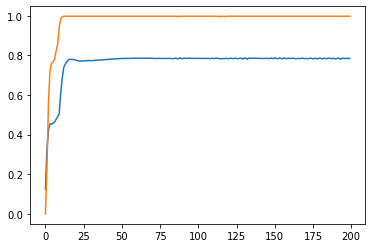

In [18]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

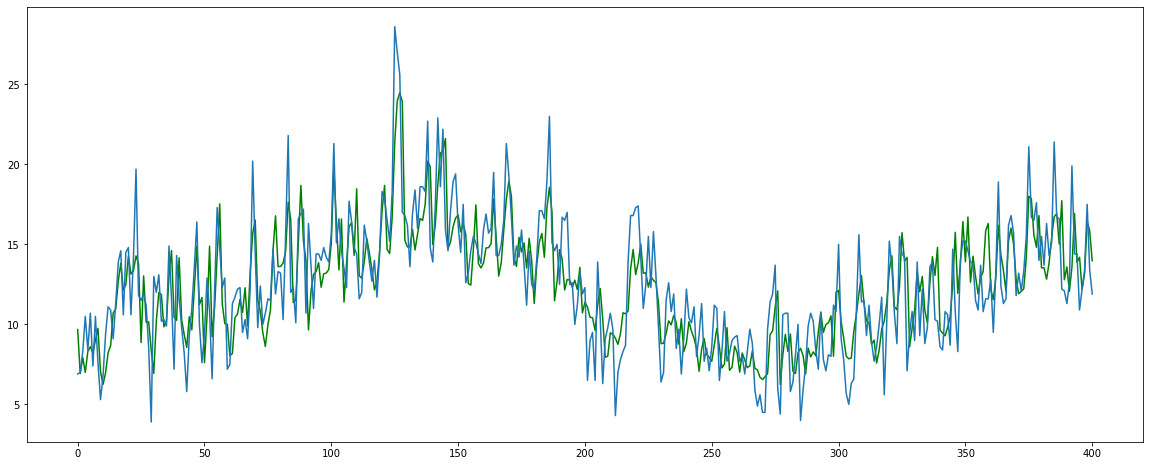

In [21]:
plt.figure(figsize=(20,8))
T=range(y_pred.shape[0])
plt.plot(T,y_pred[:,0],c='g')
plt.plot(T,actual_y_pred[:,0])

In [25]:
scores=model.evaluate(actual_y_pred,y_pred,verbose=0)
a=scores[1]*100


100.0

In [25]:
input_data=[]
print('enter the weather parametres of previous days')
att1=float(input("enter the maximum temperature"))
att2=float(input("enter the minimum temperature"))
att3=float(input("enter the rainflow"))
att4=float(input("enter the evaporation"))
att5=float(input("enter the year"))
input_data.append(att1)
input_data.append(att2)
input_data.append(att3)
input_data.append(att4)
input_data.append(att5)
input_data=np.array(input_data)
input_data.shape=(1,5)
input_data=scaler.transform(input_data)
pred1=model.predict(input_data)
pred2=scaler.inverse_transform(pred1)
pd.DataFrame(pred2)


enter the weather parametres of previous days
enter the maximum temperature32
enter the minimum temperature28
enter the rainflow2.8
enter the evaporation3.5
enter the year2013
1/1 [==============================] - 0s 28ms/step


,0,1,2,3,4
0,20.833176,25.17437,12.632771,4.917463,2012.606323
